# <font color=Green> Week 7 - Lecture 2: </font>
# <font color=Green>  Making Simple Plots </font>

## Learning Objectives:
### Students will be able to :
- Use Matplotlib to plot different charts
    * line chart
    * Bar chart
    * Scatter plot 
- Adjudting plot appearance,
    * Add Labels to the chart
    * Change the attributes (color, marks, style, width)
    * Set the x-ticks of plot
    * Set plot's x and y axis limits 
    * Add title to plot
    * Rotate the x-ticks labels with some degree (e.g 90 or 45  degrees)
    * Set plot's figure size

- Given 1 or 2 lists of data values (data series), make single line chart for one list aginst the other
    * If two are given, then One will serve as x-axis values, the other as y-axis values
    * If Only one is given, it will serve as y-axis values, its index will be used as x-axis values
    
 
- Given multiple (more than 2)  lists plot multiple line charts on single plot
    - Add labels and legend to plot (since it has multiple data series) using plots handles
    - Change the line attributes (color, marks, style, width)
    
* Given a list of values, make single Bar chart
    * Change bar width and space between bars
    * Use bar width to control the position of x-ticks labels
         
* Given a list of data values make a scatter plot
    * Select the points (marker) color and shape
    
* Use pre-set matplotLib color maps to set markers colors


--------

#### Import the needed packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

#  <font color = #2e86c1 > 1- Make simple plots using matplotlib </font>

## Example 1:  Plotting two quantitative lists  as Line chart

#### 1.a) Our data

For this example we are going to plot the data given by the equation $Y(x)=e^x$ for x values between 0 and 5. 

Let's create a list from 0 to 5 with each step being 0.1 higher than the previous, and this list will serve as our X values (Xs)

In [2]:
Xs = np.arange(0, 5, 0.1)
Xs

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

Now we can generate $Y$ values using `np.exp()` function and get a series of $Y$ values corresponds to our input values ($Xs$)  
* i.e.  $Ys = np.exp(Xs)$ 

In [3]:
Ys = np.exp(Xs)
Ys[:5]

array([1.        , 1.10517092, 1.22140276, 1.34985881, 1.4918247 ])

Or As a list

In [4]:
Ys = [np.exp(x) for x in Xs]
Ys[:5]

[1.0,
 1.1051709180756477,
 1.2214027581601699,
 1.3498588075760032,
 1.4918246976412703]

#### 1.b) Making simple line plot using `plt.plot()`

Now let's create a line plot based on the two lists we have created (the Xs vs the Ys)

`matplotlib` has  `.plot()` function which can be used to Plot y versus x as lines and/or markers.

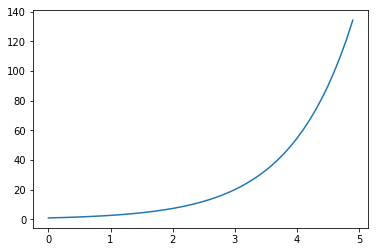

In [5]:
# Just data as parameters, everything else use default values
plt.plot(Xs, Ys)


* Note that:
    * Sometimes nothing shows up, so you may need to call ``.show()`` method on our plot, or  use ``%matplotlib inline`` magic command at the begining to make Jupyter display the plots in the output cells
    * There is some text displayed at the begining of the output(before the plot), which is the object returned by the called `matplotlib` function. 
        * This object can be used as a handle to  manually add/edit things for a specific graph. For example,  to be able to change the axis labels, or add a second line to the plot after calling the function. To do that you need to save the object in a new variable
        
        * plot() actually returns a tuple with one object. So you can use python automatic unpacking feature to extract the tuple items directly during the assignment. In this case you need to use a list of variables separated by a `comma` as the assignment target list. That is,  you ask Python to unpack the returned value and assign its elements to each variable in the target list to the left in turn.

        * If we didn't use automatic unpacking then you need to index the items in the returned  tuple manually. For example, handle[0] to extract the first item 
        
        * If you don't want to use the returned value but you want to prevent this text from showing up you can assign the returned value to unused variable like `_`

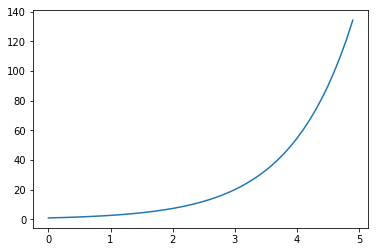

In [5]:
# Assign the returned object to `_` to prevent the object description text from showing up
_ = plt.plot(Xs, Ys)

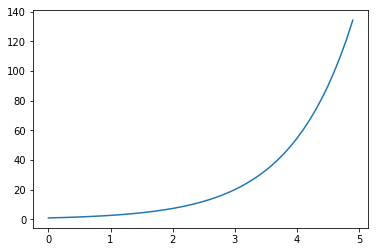

In [6]:
# if nothing shows up, you may use .show() method
plt.plot(Xs, Ys)
# Show the graph that we have created
plt.show()

#### 1.c) Adding Labels to the plot

#### Adding axes Labels 

Our graph look ok, but missing some labels, so let's add x and y axes labels as "X values" and "$Y = e^x$" repectively. 
    * Note how the equation is written using `LaTeX` format 
The method `.xlabel()` can be used to set the x-axis label, and the method `.ylabel()` is used to set the y-axis label

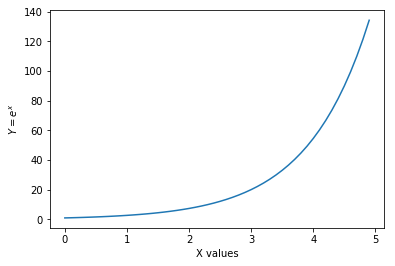

In [10]:
# Add axes labels
plt.xlabel("X values")
plt.ylabel("$Y=e^{x}$")  #  text between $ signs is rendered as LaTeX text. Useful for equations 

# We have to plot our chart once again because we cannot change it after being shown
_= plt.plot(Xs, Ys)

#### Adding Plot Title 

We can use `.title()` method to assign a title to our plot as follows

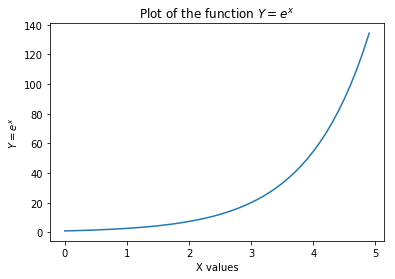

In [11]:
# Add axes labels
plt.xlabel("X values")
plt.ylabel("$Y=e^x$")  #  text between $ signs is rendered as LaTeX text. Useful for equations 

# Add/set Plot title
plt.title("Plot of the function $Y=e^x$ ")

# We have to plot our chart once again because we cannot change it after being shown
_= plt.plot(Xs, Ys)


## Example 2:  Plotting Multiple Line charts in One Plot using muliple `plt.plot()`calls

In this example we want to plot high and low Temperatures of Denver Colorado across an entire year. The tempratures are given in `Fahreneit` scale. We want also to plot the average temperature of each month as well.

It doesnt make sence if we plot Highs vs Lows here. So we are going to plot Months Vs Highs, and Months vs Lows. Since our months can be represented by integer numbers between 1 and 12, we need to create a list of integer numbers and use them as our x axis values (Position). 

* <font color = Red> Q: What is(are) the visual variable(s) we are using here? </font>

In [12]:
# Let's create a list of month indexes between (1-12) to use it as x axis values
Months = np.arange(1,13,1)
Months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### Our Data:
    We have 3 lists to plot, Highs, Lows, and Average (Avg)

In [13]:
#Our data values to be ploted across  the y-axis 
Highs = [45,46,54,61,71,81,88,86,77,65,52,43]
Lows = [17,20,26,34,44,53,59,57,48,36,25,17]

In [14]:
# Average weather temp for each month
Avg = (np.array(Highs) +np.array(Lows))/2
Avg

array([31. , 33. , 40. , 47.5, 57.5, 67. , 73.5, 71.5, 62.5, 50.5, 38.5,
       30. ])

#### Plotting the 1st Data List (Months Vs  Highs)

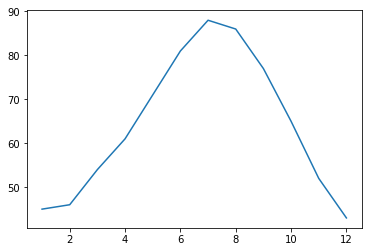

In [15]:
# Plot the month index vs Highs 
plt.plot(Months, Highs)
plt.show()

#### Plotting the 2nd Data List (Months Vs Lows)

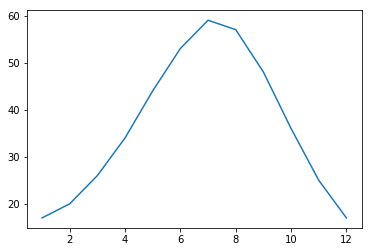

In [16]:
# Plot the Lows temp
plt.plot(Months, Lows)
plt.show()

#### Plotting the two Data Lists on one plot (Months Vs  Highs-and- Lows )

We can see from the previous two plots that it is difficult to compare the Highs and Lows lines, so Let's plot both of the lines on one figure

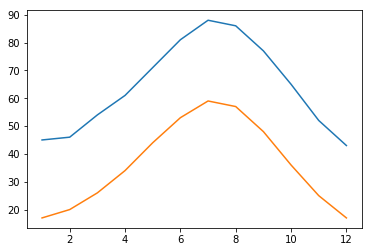

In [15]:
# Plot both Highs and Lows on the same chart
plt.plot(Months, Highs)
plt.plot(Months, Lows)
plt.show()

Let's add Average too

#### Plotting the three Data Lists on one plot (Months Vs  Highs-Lows- and-Avg)

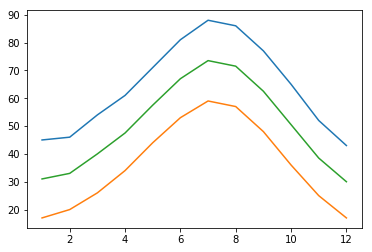

In [16]:
# Plot Highs, Lows, and Average on the same chart
plt.plot(Months, Highs)
plt.plot(Months, Lows)
plt.plot(Months, Avg)

plt.show()

### Improving our visual

Let's improve our chart by adding Labels, change some of the line attributes, and adding Legend
* We can change the following line attributes:
    * marker, see https://matplotlib.org/api/markers_api.html for list of markers 
    * color
    * linewidth 
    * linestyle, see https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
* Using handles gives us the ability to manipulate each plot, for example pass them to legend() 
* In order to reference each line in the legend we need to assign a lable for it using the parameter ``label``

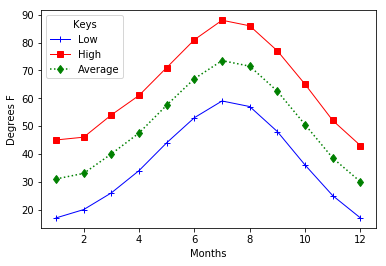

In [17]:
# Use variables and auto-Unpacking to save the returned object as a handle for each plot
hLows, = plt.plot(Months, Lows,  marker="+", color="blue", linewidth=1,  label="Low")
hHighs,= plt.plot(Months, Highs, marker="s", color="Red",  linewidth=1,  label="High")
hAvg,  = plt.plot(Months, Avg,   marker="d", color="Green",linewidth=1.5,linestyle = ":", label="Average")

# Create labels for the X and Y axis
plt.xlabel("Months")
plt.ylabel("Degrees F")

# Create a Legend and Set its position to where the chart thinks is best 
# (using the parameter loc = "best")
plt.legend(handles=[hLows,hHighs,hAvg], loc="best", title="Keys")

# Save and display the chart
plt.savefig("DenverTemp.png")
plt.show()

* Note the effect of the new parameters we used with `.plot()`
    * the marker shape: e.g.  `marker="+"`
    * The marker color: e.g. `color="blue"`
    * The line width: e.g. `linewidth=1`
    * The line style : e.g. to make avg dotted line we used `linestyle = ":"`
    * Assign labels to each line: It is useful to put that in the legend, e.g.  `label="Low"`


* The `.legend()` function adds legend based on the contents of the visual
    
    `plt.legend(handles=[hLows,hHighs,hAvg], loc="best")`
    
   You can control the appearance of the legend using some parameters, like:
     * `handles`,  list of handels to access the labels and the properties of each plotted series
     * `loc`,  Location of the legend
     * `title`,  Title of the legend
     * See the documentations for more parameters, like `ncol`, `fontsize`, ....
       

* To Save the resulted image use `plt.savefig("DenverTemp.png")`

### Changing the axis ticks labels

Having x-axis ticks in this example as numbers is not very useful, so let's change that to text with month names

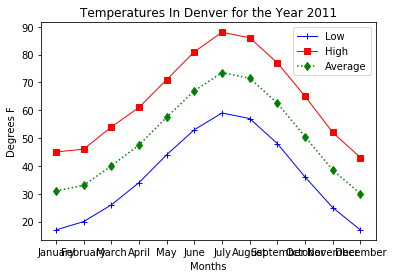

In [18]:
# Month numbers
Months = np.arange(1,13,1)

# Create a List of month names
MonthNames = ["January" ,"February" ,"March" ,"April" ,"May" ,"June" ,"July" ,"August" ,"September" ,"October", "November" ,"December"] 
tick_locations = Months #= [value for value in Months]

# Use variables and auto-Unpacking to save the returned object as a handle for each plot
hLows, = plt.plot(Months, Lows,  marker="+", color="blue", linewidth=1, label="Low")
hHighs,= plt.plot(Months, Highs, marker="s", color="Red",  linewidth=1, label="High")
hAvg,  = plt.plot(Months, Avg,   marker="d", color="Green",linewidth=1.5, linestyle = ":", label="Average")

# Give our chart some labels and a tile
plt.title("Temperatures In Denver for the Year 2011")

# Create labels for the X and Y axis
plt.xlabel("Months")
plt.ylabel("Degrees F")

# Tell matplotlib where we would like to place each of our x axis headers
plt.xticks(tick_locations, MonthNames)  # The 1st param is tick locations, and the 2nd is tick labels


# Create a Legend and Set its position to where the chart thinks is best 
# (using the parameter loc = "best")
plt.legend(handles=[hLows,hHighs,hAvg], loc="best")

# Save and display the chart
plt.savefig("DenverTemp.png")
plt.show()

#### Rotate the axis ticks labels

Note: The names overlap because they are long strings, So we may rotate the labels to some degree (e.g. 45) to avoid the overlap. 
To do that we can add the parameter `rotation=45` to `plt.xticks()` as follows:

`plt.xticks(Months, MonthNames, rotation=45)`

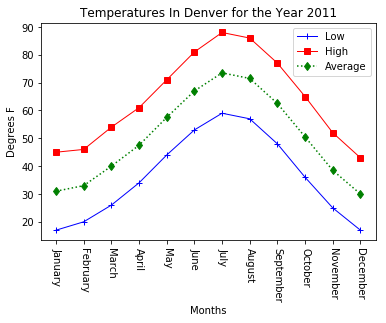

In [22]:
# Month numbers
Months = np.arange(1,13,1)

# Create a List of month names
MonthNames = ["January" ,"February" ,"March" ,"April" ,"May" ,"June" ,"July" ,"August" ,"September" ,"October", "November" ,"December"] 


# Use variables and auto-Unpacking to save the returned object as a handle for each plot
hLows, = plt.plot(Months, Lows,  marker="+", color="blue", linewidth=1, label="Low")
hHighs,= plt.plot(Months, Highs, marker="s", color="Red",  linewidth=1, label="High")
hAvg,  = plt.plot(Months, Avg,   marker="d", color="Green",linewidth=1.5, linestyle = ":", label="Average")

# Give our chart some labels and a tile
plt.title("Temperatures In Denver for the Year 2011")

# Create labels for the X and Y axis
plt.xlabel("Months")
plt.ylabel("Degrees F")

# Tell matplotlib where we would like to place each of our x axis headers
plt.xticks(Months, MonthNames, rotation=-90)  # rotation=45 to rotate the labels by 45 degrees


# Create a Legend and Set its position to where the chart thinks is best 
# (using the parameter loc = "best")
plt.legend(handles=[hLows,hHighs,hAvg], loc="best")

# Save and display the chart
plt.savefig("DenverTemp.png")
plt.show()

#### Note : The comma in the line `hLows, = plt.plot (....) ` is important for the auto-unpacking.

As we mentioned above, plot() returns a tuple with one element. By adding the comma to the target variable (list with one variable), you're  telling Python to unpack the returned tuple and assign its 1st element to the first variable on the left of the assignment operator `=`.

If we didn't add the extra comma, no automatic unpacking will be performed, so you need to  manually extract the 1st element using its index [0]. 

For example: The code below uses `hLowsTuple` to store the entire tuple, so we need to manually extract the first element (which is the handle to the plot) using its 0 index as `hLows = hLowsTuple[0]`

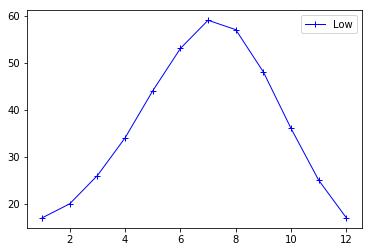

In [42]:
hLowsTuple = plt.plot(Months, Lows, marker="+",color="blue", linewidth=1, label="Low")

#Extract the handle from the tuple
hLows = hLowsTuple[0]

# use the handle `hLows` to add legend to the plot

plt.legend(handles=[hLows], loc="best")
plt.show()

## Example 3: Simple single Bar Chart using `plt.bar()`

Let's plot the Highs list in the previous example as Bar chart

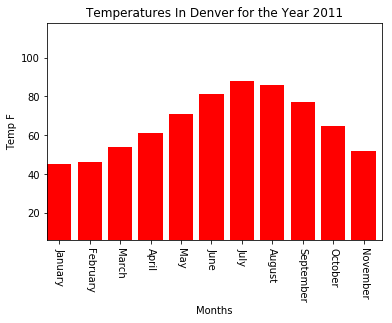

In [29]:
# Month numbers
Months = np.arange(1,13,1)

# Create a List of month names
MonthNames = ["January" ,"February" ,"March" ,"April" ,"May" ,"June" ,"July" ,"August" ,"September" ,"October", "November" ,"December"] 

# Tell matplotlib that we will be making a bar chart
# 
# We apply align="edge" to ensure our bars line up with our tick marks
myBars = plt.bar(Months, Highs, color='r',  align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
# Let's shift the location to the right (center of the bars)
tick_locations =  Months+0.4 # or =[value+0.4 for value in x_axis]
plt.xticks(tick_locations, MonthNames, rotation = -90)

# Sets the x limits of the current chart
plt.xlim(1, len(Months))

# Sets the y limits of the current chart
plt.ylim(6, max(Highs)+30)

# Give our chart some labels and a tile
plt.title("Temperatures In Denver for the Year 2011")
plt.xlabel("Months")
plt.ylabel("Temp F")
plt.show()

######  Changing space between bars
* The horizontal space of the figure is devided equally between the bars (bar groups), and each bar can occupy as much as we want from its space.
* We can control the space between the bars using the `width` parameter. It specifies the percentage of space dedicated to each column that will be used as bar width. For example if we said our bar width should be 40% of the space (i.e. `width =0.4` ) of each bar, then we will have a space between bars equal to 60%  (i.e. 1-0.4 =0.6). If we set `width=1`, then there will be no spaces between the bars.


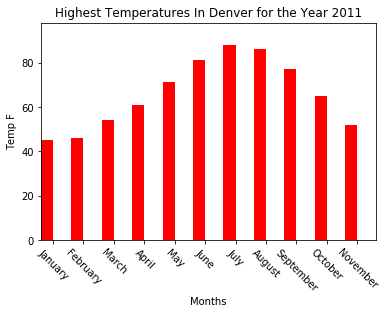

In [36]:
barWidth = .8 # So the space will be .6 (60%) 
plt.bar(Months, Highs, width = barWidth, color='r', align="edge")

# We also adjust the xtick location 
# this time I will calculate the shifting distance to get the bar center using barWidth/2
tick_locations = Months +barWidth/2 # or =[value+barWidth/2 for value in Months]
plt.xticks(tick_locations, MonthNames, rotation=-45)

# Sets the x limits of the current chart
plt.xlim(1, len(Months))

# Sets the y limits of the current chart
plt.ylim(0, max(Highs)+10)

# Give our chart some labels and a tile
plt.title("Highest Temperatures In Denver for the Year 2011")
plt.xlabel("Months")
plt.ylabel("Temp F")
plt.show()

#### Changing the figure size using `.figure()`

We still see the figure is small, let's change the figure size using `.figure()` method

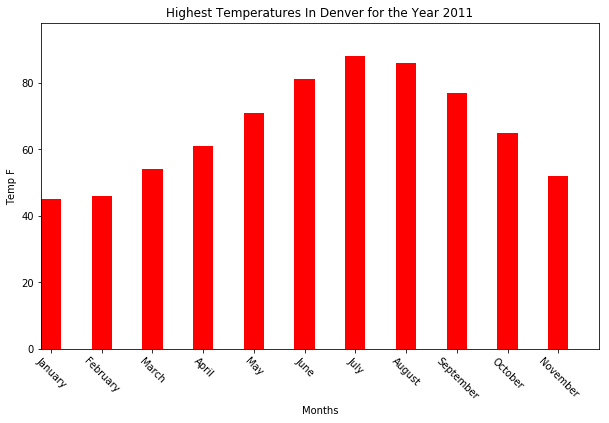

In [37]:
# Set the figure size
plt.figure(figsize=(10,6))

barWidth = 0.4 # So the space will be .6 (60%) 
plt.bar(Months, Highs, width = barWidth, color='r', align="edge")

# We also adjust the xtick location 
# this time I will calculate the shifting distance to get the bar center using barWidth/2
tick_locations = Months +barWidth/2 # or =[value+barWidth/2 for value in Months]
plt.xticks(tick_locations, MonthNames, rotation=-45)

# Sets the x limits of the current chart
plt.xlim(1, len(Months))

# Sets the y limits of the current chart
plt.ylim(0, max(Highs)+10)

# Give our chart some labels and a tile
plt.title("Highest Temperatures In Denver for the Year 2011")
plt.xlabel("Months")
plt.ylabel("Temp F")
plt.show()

## Example 4: Simple Scatter plot using `.scatter()`

Let's plot `Highs` temperature data as scatter plot 

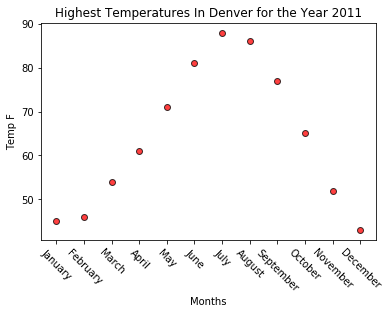

In [38]:
# Tells matplotlib that we want to make a scatter plot
plt.scatter(Months, Highs, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

tick_locations = Months 
plt.xticks(tick_locations, MonthNames, rotation=-45)


# Give our chart some labels and a tile
plt.title("Highest Temperatures In Denver for the Year 2011")
plt.xlabel("Months")
plt.ylabel("Temp F")

# Show the plot on screen
plt.show()

# <font color = #2e86c1 > 2- Using Color maps </font>

Matplotlib has support for visualizing information with a wide array of colors and colormaps
There are many ways to specify colors in matplotlib functions, including:
   * an RGB or RGBA (red, green, blue, alpha) tuple of float values in \[0, 1\] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3))
   * a hex RGB or RGBA string (e.g., '#0f0f0f' or '#0f0f0f80'; case-insensitive);
   * a string representation of a float value in \[0, 1\] inclusive for gray level (e.g., '0.5');
   * one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

Color maps are set of predefined color lookup tables that help us choose from a wide range of color schems. 

You can view the color schemes of all colormaps in the documentation and the currently available colormap names are listed below (they are case sensitive!). 
As per the documentations, "for many applications, a perceptually uniform colormap is the best choice"

* **Sequential** :
 
     * Uniform Sequential (one in which equal steps in data are perceived as equal steps in the color space) like:    \['viridis', 'plasma', 'inferno', 'magma'\]

     * Or just Sequential, like:  \['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'\]

     * Sequential (2), like: \['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'\]

* **Diverging** :
(have monotonically increasing values up to a maximum, followed by monotonically decreasing  values. Approximately equal minimum values at opposite ends of the colormap) 

    * Example: \['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'\]

* **Cyclic**: ( start and end on the same color, and meet a symmetric center point in the middle.)   

    * Example: \['twilight', 'twilight_shifted', 'hsv'\]

* **Qualitative**: 
(Qualitative colormaps are not aimed at being perceptual maps. Values move all over the place throughout the colormap, and are clearly not monotonically increasing. These would not be good options for use as perceptual colormaps.)

   * Examples: \['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'\]

* **Miscellaneous**: (have particular uses for which they have been created. For example, gist_earth, ocean, and terrain all seem to be created for plotting topography (green/brown) and water depths (blue) together. CMRmap was created to convert well to grayscale.)
    * Example: \['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',           'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'\]

We can import the color maps form matplotlib and assign it an alias, or use our imported `matplotlib` alias with`.cm` to call the color maps functions. 

In [26]:
# import colormaps as cm
from matplotlib import cm
cmp= cm.get_cmap('Reds', 100)

The `.get_cmap()` function is used to select a color map by specifying the colormap `name` and integer giving the number of entries desired in the colors lookup table. 

In [39]:
# to get a color map with 100 entries of "Reds"
cmp= plt.cm.get_cmap('Reds', 100)

#List some color values. Each color is represented by 4 numbers (3 RGB components and (transperancy) alpha)
cmp([50,20,30,40,50]) # check color components at these locations

array([[0.98241236, 0.40823926, 0.28544266, 1.        ],
       [0.99124579, 0.78902753, 0.70512973, 1.        ],
       [0.98823529, 0.66512181, 0.55317885, 1.        ],
       [0.98732422, 0.53610616, 0.41061596, 1.        ],
       [0.98241236, 0.40823926, 0.28544266, 1.        ]])

In [40]:
#check the number of colors in the lookup table created by `.get_cmap()`
cmp.N

100

Now we can pick colores from the colormap according to some data values. 

For example: Let's pick colores according to the temperatures in the `Highs` data  

In [41]:
MyColors = cmp(Highs)
MyColors

array([[0.98573975, 0.47272727, 0.34723708, 1.        ],
       [0.98542286, 0.4600515 , 0.3345613 , 1.        ],
       [0.96720143, 0.3486631 , 0.24741533, 1.        ],
       [0.94058229, 0.24440483, 0.1808675 , 1.        ],
       [0.83315508, 0.13016439, 0.12917409, 1.        ],
       [0.71479501, 0.07486631, 0.09661319, 1.        ],
       [0.62004357, 0.05228758, 0.0788671 , 1.        ],
       [0.65458507, 0.06060606, 0.08393741, 1.        ],
       [0.76296296, 0.08627451, 0.10675381, 1.        ],
       [0.90160428, 0.19671222, 0.15769459, 1.        ],
       [0.97480689, 0.37845118, 0.266429  , 1.        ],
       [0.98637354, 0.49807883, 0.37258863, 1.        ]])

##### Using cmp to get encode values as colors
Use the form ``cmp(values,alpha)``

where:
`values` is the list of data numeric values we want to map to colores, and it has the following cases:

* If `values` are floats: They should be in the interval ``[0.0, 1.0]`` to
    return the RGBA values ``X*100`` percent along the Colormap line.
    
* If `values` are integers: They should be in the interval ``[0,Colormap.N)`` to return RGBA values *indexed* from the Colormap with index ``values``.

Let's plot our data using the new set of colors. Note the each value in the `Highs` list will be plotted with different color

In [1]:
%matplotlib qt
# similar to
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')

In [46]:
%matplotlib inline
#or
get_ipython().run_line_magic('matplotlib', 'inline')

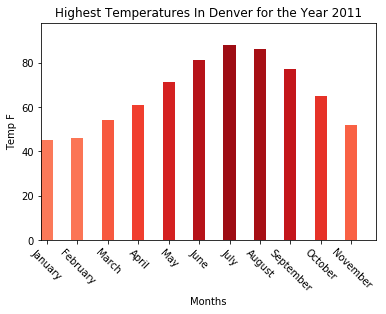

In [47]:
barWidth = 0.4 # So the space will be .6 (60%) 
plt.bar(Months, Highs, width = barWidth, color=MyColors, align="edge")

# We also adjust the xtick location 
# this time I will calculate the shifting distance to get the bar center using barWidth/2
tick_locations = Months +barWidth/2 # or =[value+barWidth/2 for value in Months]
plt.xticks(tick_locations, MonthNames, rotation=-45)

# Sets the x limits of the current chart
plt.xlim(1, len(Months))

# Sets the y limits of the current chart
plt.ylim(0, max(Highs)+10)

# Give our chart some labels and a tile
plt.title("Highest Temperatures In Denver for the Year 2011")
plt.xlabel("Months")
plt.ylabel("Temp F")
plt.show()

**Plot the dataset using scatter plot and color map**

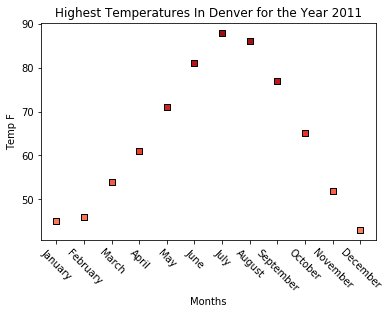

In [43]:
# Tells matplotlib that we want to make a scatter plot
plt.scatter(Months, Highs, marker="s", facecolors=MyColors, edgecolors="black")

tick_locations = Months 
plt.xticks(tick_locations, MonthNames, rotation=-45)


# Give our chart some labels and a tile
plt.title("Highest Temperatures In Denver for the Year 2011")
plt.xlabel("Months")
plt.ylabel("Temp F")

# Show the plot on screen
plt.show()

# <font color=red> Learning Activity </font>

Plot the data generated by the code in the cell below as x and y using :

1. Scatter plot with the following properties:
        
       a. triangle marker
       b. Markers colored using color map 'coolwarm' and no edge color
       c. rotated x-axis by 45 degrees
       d. label x-axis as "Years" and y-axis as "Some random Values"
       e. add the title "Scatter Plot: Learning activity of week 8"
       f*. change marker size to 100
    
2. Bar chart with the following properties:
    
        a. Bar with 80% and space between bars 20% aligned by edge
        b. Bars are colored using color map 'coolwarm'
        c. rotated x-axis by 45 degrees, and make them in the middle of the bars
        d. label x-axis as "Years" and y-axis as "Some random Values"
        e. add the title "Bar Chart: Learning activity of week 8"
Note: The colors generated by the color map  should cover the range of y values
        
** Share your plots in Week 8 discussion **

In [69]:
x = np.arange(1990,2010)
y = np.random.randint(1,100, 20)
